In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv(r'E:\Dip dataset\fer2013.csv')
print (df.values.shape)

(35887, 3)


In [3]:
df.Usage.value_counts()

Training       28709
PublicTest      3589
PrivateTest     3589
Name: Usage, dtype: int64

In [4]:
groups = [i for _, i in df.groupby('Usage')]
training_data = groups[2]
validation_data = groups[1]
testing_data = groups[0]

In [5]:
training_data.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [6]:
validation_data.head()

,emotion,pixels,Usage
28709,0,254 254 254 254 254 249 255 160 2 58 53 70 77 ...,PublicTest
28710,1,156 184 198 202 204 207 210 212 213 214 215 21...,PublicTest
28711,4,69 118 61 60 96 121 103 87 103 88 70 90 115 12...,PublicTest
28712,6,205 203 236 157 83 158 120 116 94 86 155 180 2...,PublicTest
28713,3,87 79 74 66 74 96 77 80 80 84 83 89 102 91 84 ...,PublicTest


In [7]:
training_data.emotion.value_counts()

3    7215
6    4965
4    4830
2    4097
0    3995
5    3171
1     436
Name: emotion, dtype: int64

In [8]:
validation_data.emotion.value_counts()

3    895
4    653
6    607
2    496
0    467
5    415
1     56
Name: emotion, dtype: int64

In [9]:
testing_data.emotion.value_counts()

3    879
6    626
4    594
2    528
0    491
5    416
1     55
Name: emotion, dtype: int64

In [10]:
num_classes = 7
width = 48
height = 48
emotion_labels = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]
classes=np.array(("Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"))

In [11]:
#Feature Extraction
X_train = np.array(list(map(str.split, training_data.pixels)), np.float32) 
X_val = np.array(list(map(str.split, validation_data.pixels)), np.float32) 
X_test = np.array(list(map(str.split, testing_data.pixels)), np.float32) 
X_train = X_train.reshape(X_train.shape[0], 48, 48, 1) 
X_val = X_val.reshape(X_val.shape[0], 48, 48, 1)
X_test = X_test.reshape(X_test.shape[0], 48, 48, 1)

In [12]:
X_train.shape

(28709, 48, 48, 1)

In [13]:
from keras.utils import np_utils
y_train = training_data.emotion 
y_train = np_utils.to_categorical(y_train, num_classes) 
y_val = validation_data.emotion 
y_val = np_utils.to_categorical(y_val, num_classes) 
y_test = testing_data.emotion 
y_test = np_utils.to_categorical(y_test, num_classes) 

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  35887 non-null  int64 
 1   pixels   35887 non-null  object
 2   Usage    35887 non-null  object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB


In [15]:
def fer2013_show_instance(index):
    """Shows the image and the emotion label of the index's instance."""
    image = np.reshape(training_data.at[index, "pixels"].split(" "), (width, height)).astype("float")
    image -= np.mean(image)
    image /= np.std(image)
    print(emotion_labels[training_data.at[index, "emotion"]])
    plt.imshow(image, cmap="gray")

Neutral


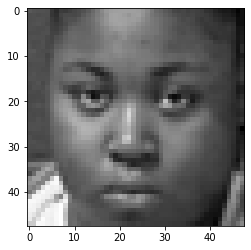

In [20]:
fer2013_show_instance(np.random.randint(90,len(training_data)))

In [21]:
def fer2013_to_X():
   
    
    X = []
    pixels_list = training_data["pixels"].values
    
    for pixels in pixels_list:
        single_image = np.reshape(pixels.split(" "), (width, height)).astype("float")
        X.append(single_image)
        
    # Convert list to 4D array:
    X = np.expand_dims(np.array(X), -1)
    
    # Normalize image data:
    X -= np.mean(X, axis=0)
    X /= np.std(X, axis=0)
    
    return X

In [22]:
X = fer2013_to_X()
X.shape

(28709, 48, 48, 1)

In [23]:
y = pd.get_dummies(training_data['emotion']).values
y.shape

(28709, 7)

In [24]:
training_data.describe()

,emotion
count,28709.000000
mean,3.317427
std,1.876632
min,0.000000
25%,2.000000
50%,3.000000
75%,5.000000
max,6.000000


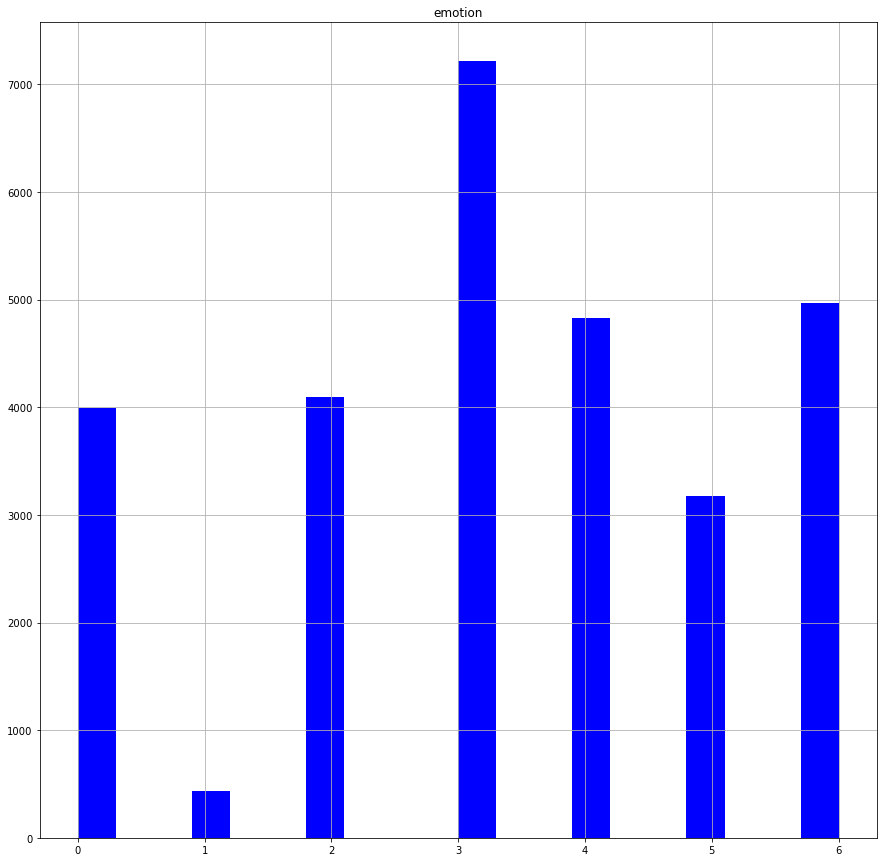

In [25]:
training_data.hist(bins=20, figsize=(15,15), color='b')
plt.show()